In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
print(df.head())
print(df.info())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [4]:
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [6]:
print(df['horsepower'].unique())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [7]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [8]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


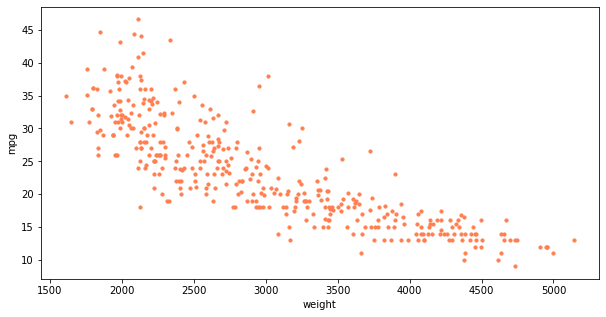

In [9]:
# 종속 변수 y인 연비(mpg)와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5)) # 컬러, 점크기
plt.show()
plt.close()

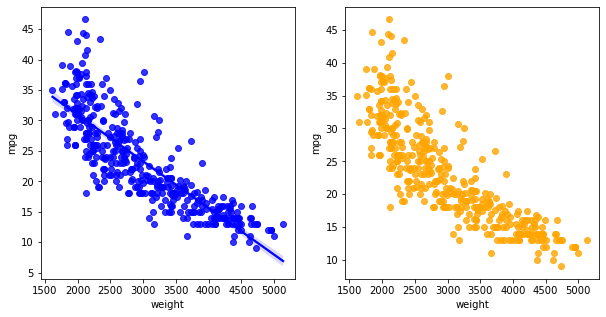

In [12]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1, color='blue') # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False, color='orange') # 회귀선 미표시
plt.show()
plt.close()

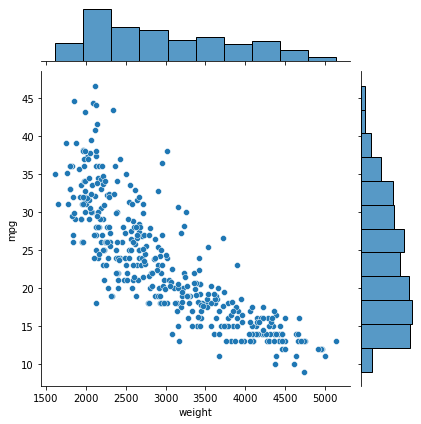

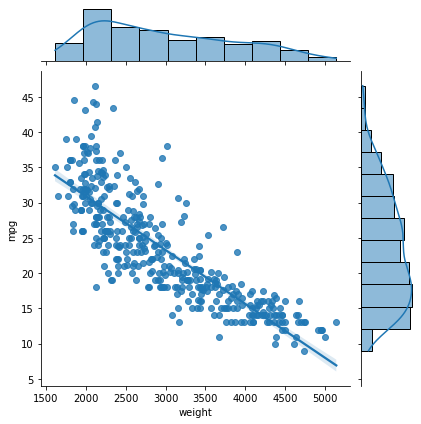

In [14]:
#seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight',y='mpg', data=ndf) # 회귀선 없음
sns.jointplot(x='weight',y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

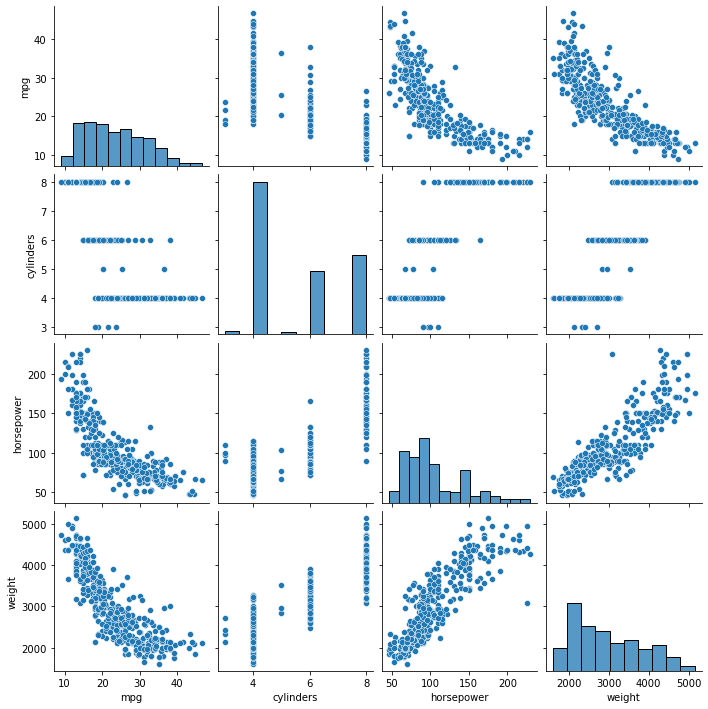

In [15]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
# info, describe 같은 여러개의 데이터를 한눈에 볼 수 있게 한다.
sns.pairplot(ndf)
plt.show()
plt.close()

In [17]:
# 데이터셋 구분
x = ndf[['weight']] # 데이터프레임
y = ndf['mpg'] # 시리즈
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=66)
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  274
test data 개수:  118


In [19]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

#train data를 모형 객체 생성
#훈련은 fit 함수로 진행
#fit 함수로 모델 구축할 때는 test가 아니라 train data로 한다.
lr.fit(x_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산 / 결정계수가 높을 수록 성능이 높다.
r_square = lr.score(x_test, y_test)
print(r_square) # # sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

#train data를 모형 객체 생성
#훈련은 fit 함수로 진행
#fit 함수로 모델 구축할 때는 test가 아니라 train data로 한다.
lr.fit(x_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산 / 결정계수가 높을 수록 성능이 높다.
r_square = lr.score(x_test, y_test)
print(r_square) # 0.7357506713368035

0.7357506713368035


In [20]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_) # weight를 보자
print('y절편 b: ', lr.intercept_) # 절편을 보자 y절편을 가로질러서 인터셉트
'''
기울기 a:  [-0.00760392]
y절편 b:  46.15718067108797
'''

기울기 a:  [-0.00760392]
y절편 b:  46.15718067108797


C:\ProgramData\Anaconda3\envs\djangoProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\djangoProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


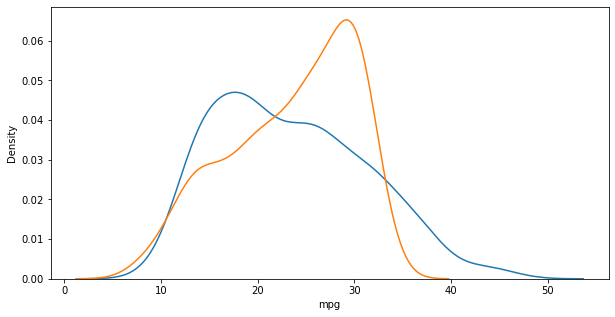

In [22]:
# 모형에 전체 x 데이터를 입력하여 에측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(x)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()
# 결론을 보니 비선형을 선형으로 그려서 안나옴 선형모델로 못함

## 다중회귀분석(Multivariate Regression)
-여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우를 다중회귀분석이라 한다.

In [23]:
x = ndf[['cylinders', 'horsepower', 'weight']] # 독립변수
y= ndf['mpg'] # 종속변수

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=66)
print('훈련 데이터: ', x_train.shape)
print('검증 데이터: ', x_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [24]:
lr = LinearRegression()
lr.fit(x_train, y_train)
r_square = lr.score(x_test, y_test)
print(r_square) # 결정계수

0.7489463885630212


In [25]:
print('x 변수의 계수 a: ', lr.coef_)
print('상수항 b: ', lr.intercept_)

x 변수의 계수 a:  [-0.28937871 -0.05001495 -0.00523238]
상수항 b:  45.859613304664364


C:\ProgramData\Anaconda3\envs\djangoProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\djangoProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


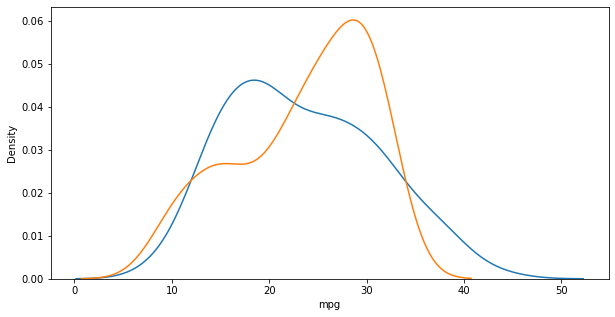

In [26]:
y_hat = lr.predict(x_test)
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

## 분류
-분류는 대상의 속성을 입력 받고, 목표 변수가 갖고 있는 카테고리 값 중에서 분류하여 예측한다.
-목표 변수 값을 함께 입력하기 때문에 지도 학습 유형에 속하는 알고리즘이다.
-KNN, SVM, Decision, Tree, Logistic Regression 등의 알고리즘이 존재

## KNN(k-Nearest-Neighbors)
-KNN은 k개의 가까운 이웃이라는 뜻이다. 관측값이 주어지면 관측값을 기준으로 가까운 순서로 k개의 속성을 찾고, 가장 많은 속성으로 분류한다. 이때 k값에 따라 정확도가 달라지므로 적절한 k값을 찾는 것이 매우 중요하다.
-타이타닉 예제


In [28]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('./data/train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [35]:
rdf = df.drop(['Cabin'], axis=1) # axis=1 열 기준 연산
#print(rdf.columns.values)
rdf = rdf.dropna(subset=['Age'], how='any', axis=0) # dropna는 결측값이 있으면 행 제거
# how='any' -> 결측값이 1개라도 있는 경우 제거, how='all' -> 모두 결측값이 존재할 경우 제거
most_freq = rdf['Embarked'].value_counts(dropna=True).idxmax() # value_counts 열의 고유값을 반환 dropna=True는 결측값 개수는 빼고 카운트한다. idxmax()는 특정열에 대하여 가장 값이 큰 row의 index를 반환
rdf['Embarked'].fillna(most_freq, inplace=True)

In [42]:
ndf = rdf[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]
#print(ndf)
onehot_sex = pd.get_dummies(ndf['Sex']) # 원핫인코딩 0과 1로만 이루어진 열을 생성
ndf = pd.concat([ndf, onehot_sex], axis=1)
onehot_embarked = pd.get_dummies(ndf['Embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)
#print(ndf)
ndf.drop(['Sex', 'Embarked'], axis=1, inplace=True)
print(ndf.columns.values)

['Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'female' 'male' 'town_C'
 'town_Q' 'town_S']


In [48]:
# 독립변수를 지정하고 StandardScaler()preprocessing.StandardScaler().fit(x).transform(x)을 활용하여 데이터의 상대적 크기 차이를 없애기 위하여 데이터 정규화를 진행한다.
x = ndf[['Pclass', 'Age', 'SibSp', 'Parch', 'female', 'male', 'town_C','town_Q', 'town_S']]
y = ndf['Survived']

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x = preprocessing.StandardScaler().fit(x).transform(x) # standardScaler => 통계화
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=66)

사이킷런에서 KNeighborClassifier를 통해 KNN 분류 모형을 가져옴
이때 k값을 넣어준다. 비지도라 k값은 알 수가 없고 여러개 해보고 제일 좋은 것을 선택한다.
그리고 학습을 진행하고 예측값과 결과값을 비교

In [50]:
from sklearn.neighbors import KNeighborsClassifier # 최근점 분류모델을 사용
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_hat = knn.predict(x_test)
print(y_hat[0:10])
print(y_test.values[0:10])

[1 1 1 1 0 1 0 0 0 0]
[1 1 1 1 0 1 1 0 0 0]


모형의 예측 능력을 평가
metrics 모듈의 confusion_matrix() 함수를 사용하여 Confusion Matrix를 계산
그리고 classficatio_report() 함수를 사용하여 precision, recall, f1-score 지표를 출력해준다.

In [52]:
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat) # 매트릭스 => 평가 측정 지표
print(knn_matrix)
knn_report = metrics.classification_report(y_test,y_hat) # 정리해서 도출되기 때문에 R보다 좋다.
print(knn_report)

[[106  23]
 [ 26  60]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       129
           1       0.72      0.70      0.71        86

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



## SVM
분류모델 중 하나로 벡터 개념을 가져와서 사용
데이터프레임의 각 열이 고유의 축을 가지는 벡터공간을 만들고,
각각의 개별의 모든 속성이 축의 좌표로 표시되어 벡터 공간에서 위치를 나타낸다.
속성이 2개가 존재하면 2차원, 4개가 존재하면 4차원 평면 공간에 데이터 셋이 좌표로 표시된다.
같은 분류 값인 데이터끼리 같은 공간에 위치시켜 벡터 공간을 여러 조각으로 나누고,
새로운 데이터에 대하여 어느 공간에 위치하는지 분류할 수 있게 한다.

In [54]:
from sklearn import svm
#kernel란? 데이터를 벡터 공간으로 매핑하는 함수
#rbf: radial basis function
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(x_train, y_train)
y_hat = svm_model.predict(x_test)
print(y_hat[0:10])
print(y_test.values[0:10])

[1 1 1 1 0 0 0 0 0 0]
[1 1 1 1 0 1 1 0 0 0]


In [55]:
svm_matrix = metrics.confusion_matrix(y_test,y_hat)
print(svm_matrix)

[[124   5]
 [ 32  54]]


In [56]:
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       129
           1       0.92      0.63      0.74        86

    accuracy                           0.83       215
   macro avg       0.86      0.79      0.81       215
weighted avg       0.84      0.83      0.82       215



## 의사결정 나무(Decision Tree)
컴퓨터 알고리즘에서 즐겨 사용하는 트리 구조를 사용하고,
각 분기점에는 목표값을 가장 잘 분류할 수 있는 분석대상의 속성들이 위치한다.
각각의 분기점에서 최적 속성을 선택시 속성을 기준으로 분류한 값들이 구분되는 정도를 측정한다.
이때 Entropy를 주로 활용하는데, Entropy가 낮을 수록 분류가 잘 된 것이고,
Entropy가 일정 수준 이하로 낮아질 때까지 앞의 과정을 반복한다.
즉, 각 분기점에서 최적의 속성을 찾기 위해 분류 정도를 평가하는 기준이 entropy이다.
- 유방암 예제

In [58]:
import pandas as pd
import numpy as up

# Brease Cancer 데이터셋 크롤링
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)
#df.to_csv('./data/brease_cancer.csv')

In [60]:
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class']
print(df.head())

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [62]:
print(df.describe())

                 id       clump   cell_size  cell_shape    adhesion  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial   chromatin  normal_nucleoli     mitoses       class  
count  699.000000  699.000000       699.000000  699.000000  699.000000  
mean     3.216023    3.437768         2.866953    1.589413    2.689557  
std      2.214300    2.438364         3.053634    1.715078    0.951273  
min      1.000000    1.000000         1.000000    1.000000    2.0000

In [68]:
print(df['bare_nuclei'].unique())

[ 1 10  2  4  3  9  7  5  8  6]


In [70]:
df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')
print(df.columns.values)

['id' 'clump' 'cell_size' 'cell_shape' 'adhesion' 'epithlial'
 'bare_nuclei' 'chromatin' 'normal_nucleoli' 'mitoses' 'class']


In [71]:
x = df[['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']]
y = df['class']

x = preprocessing.StandardScaler().fit(x).transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=66)

DecisionTreeClassifier() 함수를 사용하여 모형 객체를 생성
각 분기점에서 최적의 속성을 찾기 위한 평가 기준으로 'entropy'값을 사용
그리고 'max_depth'으로 트리 레벨을 지정가능하다.
아래처럼 5로 지정하면 5단계까지 확장할 수 있어진다.
레벨이 많아 질수록 예측은 정확해지지만,
너무 많은 트리는 훈련과정에서 train_data에만 지나치게 최적화되어 실제 데이터 예측 능력이 떨어진다.
따라서 적정한 레벨값을 찾는 것이 중요하다.

In [74]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5) # 5단계까지
tree_model.fit(x_train, y_train)
y_hat = tree_model.predict(x_test) # 2: benign(양성), 4:malignant(약성)
print(y_hat[0:10])
print(y_test.values[0:10])

[2 4 2 2 4 2 4 4 2 2]
[4 4 2 2 4 2 2 4 2 2]


In [75]:
tree_matrix = metrics.confusion_matrix(y_test,y_hat)
print(tree_matrix)

[[132   8]
 [  3  62]]


In [76]:
tree_report = metrics.classification_report(y_test,y_hat)
print(tree_report)

              precision    recall  f1-score   support

           2       0.98      0.94      0.96       140
           4       0.89      0.95      0.92        65

    accuracy                           0.95       205
   macro avg       0.93      0.95      0.94       205
weighted avg       0.95      0.95      0.95       205



## 군집(clustering)
군집 분석은 비지도학습 유형으로 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여
서로 비슷한 특징을 갖는 관측값끼리 같은 클러스트(집단)로 묶는 알고리즘이다.
각각의 클러스트는 서로 완전하게 구분되는 특징을 가지기 때문에 어느 클러스트에도 속하지 못하는 관측값이 존재할 수 있다.
따라서 이런 특성을 이용하여 특이 데이터(이상값, 중복값)를 찾는데 활용되기도 한다.

비지도학습이기 때문에 군집 분석은 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단한다.
군집 알고리즘은 신용카드 부정 사용 탐지, 구매 패턴 분석 등 소비자 행동 특성을 그룹화하는데 사용한다.
어떤 소비자와 유사한 특성을 갖는 집단을 구분하게 되면, 새로운 소비자의 구매패턴이나 행동 등을 예측하는데 활용할 수 있다.

## k-Means
데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용한다.
k개의 클러스터가 주어진다면, 각각의 클러스터에서 거리가 가까운 클러스터로 해당 데이터를 할당한다.
그리고 클러스트는 완전한 구분을 위해서 일정한 거리 이상 떨어져야 한다.
k 값이 클수록 일반적으로 모형의 정확도는 개선이 되지만, 너무 커지면 선택지가 많아지기 때문에 분석의 효과가 떨어진다.
- 예제: 도매업 고객 데이터 셋 사용

In [77]:
import pandas as pd
import numpy as np

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)
df.to_csv('./data/customer.csv')

In [78]:
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [79]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [80]:
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

비지도 학습 모형이므로 예측 변수를 지정할 필요가 없고 필요한 속성을 모두 설명 변수로 활용한다.
StandardScaler() 함수 등을 이용하여 학습 데이터를 정규화하여 상대적 크기 차이를 줄여준다.

In [81]:
from sklearn import preprocessing

x = df.iloc[:, :]
x = preprocessing.StandardScaler().fit(x).transform(x)
print(x[:5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


사이킷런에서 cluster 모듈을 import 한다.
그리고 KMeans() 함수로 모형 객체를 생성하는데 n_clusters 옵션을 사용하여 클러스터 개수를 5로 지정해 준 후에 fit()으로 학습


In [82]:
from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10) # 클러스터 개수: 5개
cluster.KMeans()
kmeans.fit(x)
cluster_label = kmeans.labels_
print(cluster_label)

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 3 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 4 1 1 0 0 1 1 0 0 4 1 0 0 1 4 1 1 0 4 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 4 4 0 0 0 0 0 4 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 3 0 3 0
 0 0 0 1 1 0 0 0 1 0 0 2 1 2 2 1 1 2 2 2 1 2 2 2 1 2 4 2 2 1 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 1 2 2 2 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 1
 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 3 2 2 2 2 2 1 2
 4 2 1 2 2 2 2 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [88]:
df['Cluster'] = cluster_label
print(df.columns.values)

['Channel' 'Region' 'Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper'
 'Delicassen' 'Cluster']


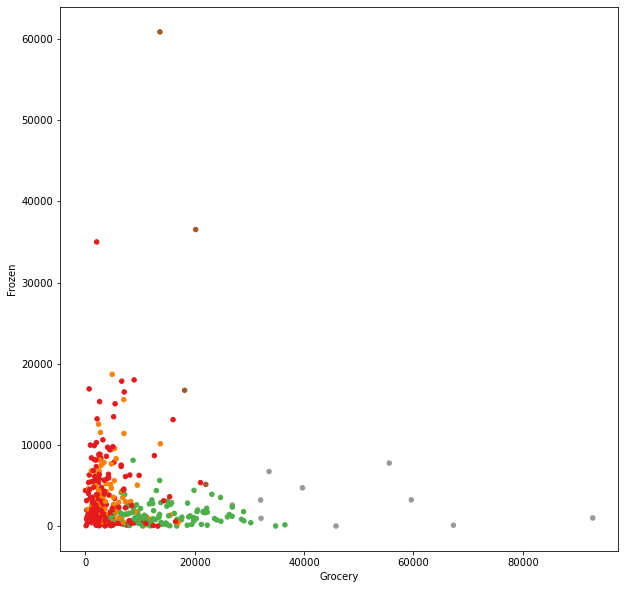

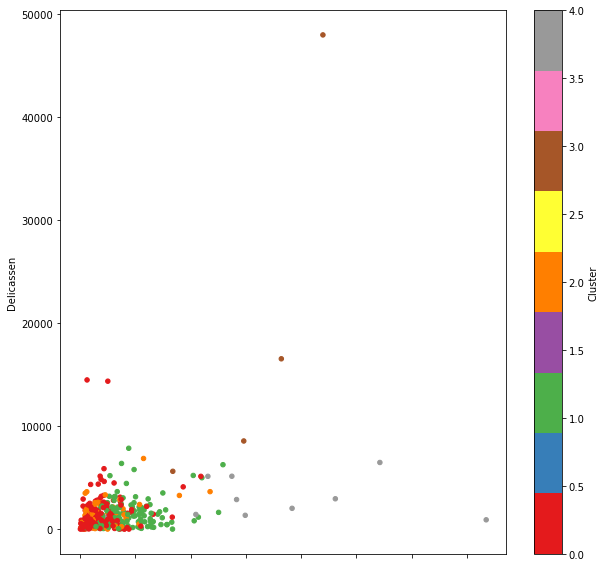

In [89]:
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10,10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, figsize=(10,10))
plt.show()
plt.close()

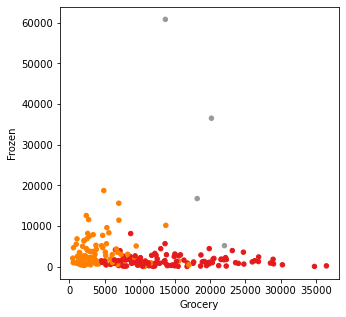

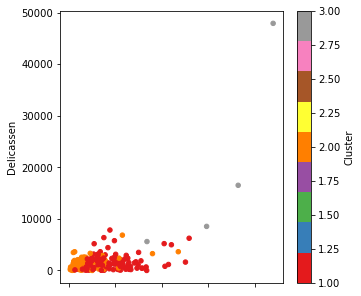

In [92]:
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]  # not

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',colorbar=False, figsize=(5,5))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, figsize=(5,5))
plt.show()
plt.close()